#### Linear Interpolation
Linearly interpolate between points

#### Preliminaries

In [1]:
# load some packages
import matplotlib.pyplot as plt
import numpy as np

# config
X_MIN = 0
X_MAX = 1
N = 11
X = np.linspace(X_MIN, X_MAX, N)
Y = np.sin(2*np.pi * X)

#### Visualize
Plot the points

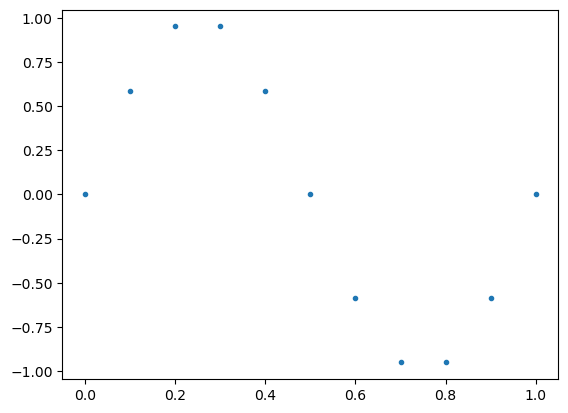

In [2]:
plt.plot(X, Y, '.')

#### Interpolation Function
To perform the interpolation, we first check and make sure the input is valid. Then, we
1. Figure out which points should be connected for each $x$ value
2. Find $x_l$ and $y_l$, the $x$ and $y$ values directly below the value we're trying to find the function at. If the $x$ or $y$ is below the minimum $x$, we put it on the line for the lowest pair of $x$ values
3. Find $x_h$ and $y_h$, the $x$ and $y$ values directly above the value we're trying to find the function at. If the $x$ or $y$ is above the minimum $x$, we put it on the line for the highest pair of $x$ values
4. Use the equation
$$
y - y_l = \frac{y_h - y_l}{x_h - x_l} (x - x_l)
$$
to interpolate the points

In [5]:
def get_linear_interpolation(x, y):
    '''
    Gets a function that performs a linear interpolation between the
    points in x and y
    '''
    # setuo
    n = len(x)
    if (np.diff(x) < 0).any():  # we interpolate between neaby points, needs to be sorted
        idxs = np.argsort(x)
        x = x[idxs]
        y = y[idxs]
    assert (x[:-1] != x[1:]).all()
    
    def linear_interpolation(X):
        '''
        The function to find the lineas interpolating the points at an X
        '''
        idx = np.minimum(np.maximum(np.searchsorted(x, X, 'right'), 1), n-1)  # min an max make sure that points before/after end up on a line
        x_l = x[idx-1]  # values below the x
        y_l = y[idx-1]
        x_h = x[idx]  # values above the x
        y_h = y[idx]
        m = (y_h - y_l) / (x_h - x_l)  # slope
        return y_l + m*(X - x_l)  
    
    return linear_interpolation

#### Interpolation Visualization
Connect the points using our interpolation. Importantly, our function returns a function for the interpolation, it doesn't interpolate itself.

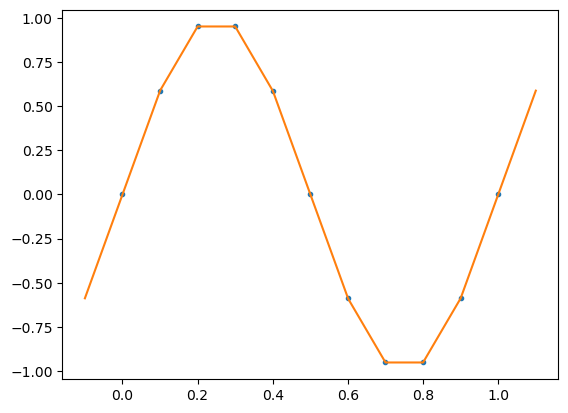

In [6]:
# grid we want to calculate values at
xrange = X_MAX - X_MIN
x_grid = np.linspace(X_MIN-xrange*0.1, X_MAX+xrange*0.1, 1001)

# plot it
plt.plot(X, Y, '.')
plt.plot(x_grid, get_linear_interpolation(X, Y)(x_grid))